# EDA PROJECT: Advertising Impacts On Sales

---

### 1. Introduction:

* In this project, we have a data set which includes TV, Radio and newspaper advertising spendings and their impacts on sales of a product.

* We have three attributes --> TV, Radio, Newspaper
* Target value --> Sales

In [102]:
# Importing packeges

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
# Identifying the Dataframe

df = pd.read_csv('data/Advertising.csv', index_col=0)

### 2. Data Cleaning:

In [32]:
# Shape of DataFrame

df.shape

(200, 4)

In [98]:
df.head(5)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [36]:
# Missing Data Control

df.isna().any()

TV           False
radio        False
newspaper    False
sales        False
dtype: bool

In [42]:
# Duplication Control

df.duplicated()

1      False
2      False
3      False
4      False
5      False
       ...  
196    False
197    False
198    False
199    False
200    False
Length: 200, dtype: bool

In [78]:
# Outliers Control (via Z score)

from scipy import stats

# We make a Z-score matrix
z = np.abs(stats.zscore(df))

# We control z whether it has value above 3 sigma.
print(np.where(z > 3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


In [79]:
# Row-16 and Row-101 has values above 3 sigma.
print(z[16][2])
print(z[101][2])

3.8411707150992718
3.238153957342154


In [80]:
# Copy the original df and drop the outlier data out of df

df_new = df.copy()
df_new.drop(labels=16,inplace=True) # Row-16
df_new.drop(labels=101,inplace=True) # Row-101
df_new.shape

(198, 4)

In [186]:
# Correction of index numbers

df_new.index = range(1,199)
df_new

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
194,38.2,3.7,13.8,7.6
195,94.2,4.9,8.1,9.7
196,177.0,9.3,6.4,12.8
197,283.6,42.0,66.2,25.5


**Data Cleaning Report:**

    1. DataFrame has been controlled whether it involves any missing or duplicated data and it has been seen that DataFrame has no missing or duplicated data.
    
    2. DataFrame has been controlled whether it involves any outlier data by means of zscore() function and two outlier data, whose standart deviations are above 3 sigma,  have been detected and dropped out of the dataframe.



### 3. Exploration of Data:

In [77]:
# Shape of dataframe

df_new.shape

(198, 4)

In [187]:
# First 10 observations

df_new.head(10)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


In [188]:
# General Information of Data

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 1 to 198
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         198 non-null    float64
 1   radio      198 non-null    float64
 2   newspaper  198 non-null    float64
 3   sales      198 non-null    float64
dtypes: float64(4)
memory usage: 6.3 KB


In [189]:
# Basic Statistics of the Data

df_new.describe()

,TV,radio,newspaper,sales
count,198.000000,198.000000,198.000000,198.000000
mean,146.417677,23.236364,30.343939,13.991919
std,86.050526,14.758327,21.786792,5.207076
min,0.700000,0.000000,0.300000,1.600000
25%,73.725000,10.025000,12.650000,10.325000
50%,148.500000,22.900000,25.600000,12.900000
75%,218.475000,36.450000,44.050000,17.375000
max,296.400000,49.600000,114.000000,27.000000


,TV,radio,newspaper
TV,1.000000,0.056545,0.050148
radio,0.056545,1.000000,0.356832
newspaper,0.050148,0.356832,1.000000


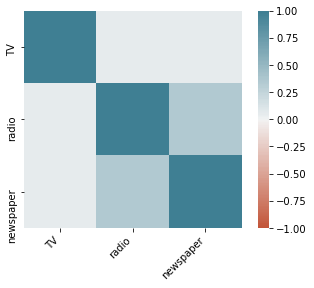

In [190]:
# Correlation Matrix of features

corr_features = df_new.drop(columns='sales')
corr = corr_features.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
corr

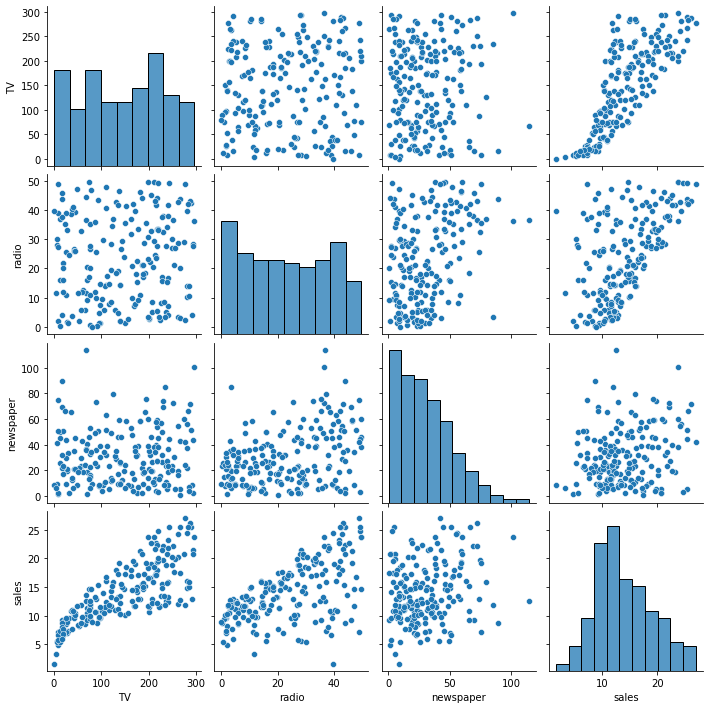

In [238]:
# Visualization of dataframe

sns.pairplot(df_new);

### 4. Feature Engineering:

In [234]:
from sklearn.preprocessing import StandardScaler

In [239]:
value_array = df_new.iloc[:,:].values

scaler = StandardScaler().fit(value_array)
scaled_value = scaler.transform(value_array)
df_scaled = pd.DataFrame(scaled_value, index = range(1,199), columns=['TV_Scaled','Radio_Scaled','Newspaper_Scaled','Sales_Scaled'])
df_scaled

,TV_Scaled,Radio_Scaled,Newspaper_Scaled,Sales_Scaled
1,0.974944,0.989310,1.787989,1.561075
2,-1.187396,1.091205,0.679011,-0.691564
3,-1.505455,1.539543,1.792591,-0.903350
4,0.059212,1.227065,1.295621,0.867955
5,0.400573,-0.844804,1.291020,-0.210231
...,...,...,...,...
194,-1.260794,-1.327107,-0.761281,-1.230656
195,-0.608364,-1.245591,-1.023571,-0.826337
196,0.356300,-0.946699,-1.101798,-0.229484
197,1.598248,1.274616,1.649942,2.215687


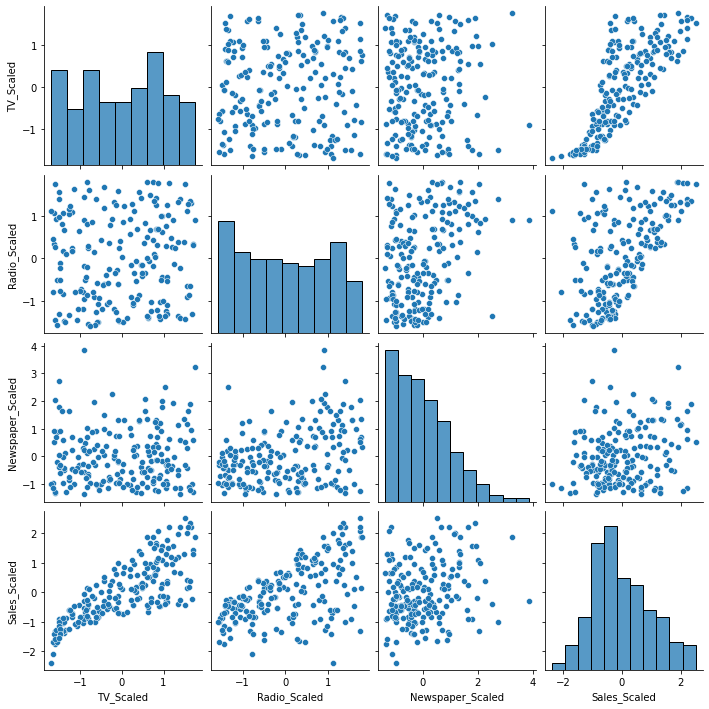

In [240]:
sns.pairplot(df_scaled);

### 5. Key Findings:

    a. After cleaning the data we started to make a simple exploratory data analysis on our dataframe. 
    b. First, we looked at summary statistics of the data.
    c. Then we visualised the data and we saw that there is a linear relation between TV-Sales and Radio Sales values.
    d. Finally we scaled the dataframe using StandardScale function.

### 6. Hypothesis Tests:

------------------------**Test-1:**------------------------

H0: There is no linear relationship between TV advertising spendings  and sales.

H1: There is linear relationship between TV advertising spendings  and sales.


------------------------**Test-2:**--------------------------

H0: There is no linear relationship between Radio advertising spendings  and sales.


H1: There is linear relationship between Radio advertising spendings  and sales.


------------------------**Test-3:**--------------------------

H0: There is no linear relationship between Newspaper advertising spendings  and sales.

H1: There is no linear relationship between Newspaper advertising spendings  and sales.

### 7. Significance Test:

H0: There is no linear relationship between TV advertising spendings  and sales.

H1: There is linear relationship between TV advertising spendings  and sales.

In [248]:
# Pearson’s Correlation Coefficient Significance Test--> whether two data have Linear Relationship
from scipy.stats import pearsonr
TV_array = df_scaled.TV_Scaled.to_numpy()
Sales_array = df_scaled.Sales_Scaled.to_numpy()
stat, p = pearsonr(TV_array, Sales_array)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('H0: There is no linear relationship between TV advertising spendings  and sales.(Probably independent)')
else:
	print('H1: There is a linear relationship between TV advertising spendings  and sales.(Probably dependent)')

stat=0.787, p=0.000
H1: There is a linear relationship between TV advertising spendings  and sales.(Probably dependent)


### 8. Suggestions for Next Steps of The Analysis:

* After EDA, feature engineering, it has been seen that there is a linearship between TV ads spendings and sales data by means of significance test.

* It is also seen that there could be a linear relationship between radio ads spendings-sales data and newspaper spendings-sales data as well.

* It's suggested that we should use linear regression model for the next steps in order to have a machine learning prediction model.

### CONCLUSION:

In the begining of the analysis, we had a data which consists of 200 samples, 3 attributes and 1 target. By means of z-core test we detected 2 outlier sample and we dropped them out of our dataframe. After scaling dataframe we visualised it saw a linear relationship between attributes and target value. We proved that there is a linear relationship between TV ads spendings and sales income by means of significance test. Finally we suggested that we should use linear regression model for the next steps.